In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv(r"C:\Users\inigo\Downloads\reservas.csv")
df.columns
df

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,momento_checkin,ratio_asistencia,ratio_cancelaciones_mes_respecto_reservas,zona_roja,estacion_estancia,estacion_reserva,antiguedad_hotel_en_dias,es_festivo,es_finde,city
0,2022-11-26,2023-01-01,2023-01-02,36,1,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.251273,1,invierno,otoño,2110,False,False,Donostia
1,2022-12-21,2023-01-01,2023-01-10,11,9,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.251273,1,invierno,invierno,2110,True,False,Donostia
2,2022-09-21,2023-01-01,2023-01-07,102,6,January,Sunday,2,4,channel_manager,...,antes,0.333333,0.251273,1,invierno,otoño,2110,True,False,Donostia
3,2022-09-24,2023-01-01,2023-01-02,99,1,January,Sunday,2,2,channel_manager,...,antes,0.500000,0.251273,1,invierno,otoño,2110,False,False,Donostia
4,2022-10-18,2023-01-01,2023-01-02,75,1,January,Sunday,4,0,channel_manager,...,antes,1.000000,0.251273,1,invierno,otoño,2110,False,False,Donostia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,2023-10-10,2023-12-31,2024-01-01,82,1,December,Sunday,4,0,channel_manager,...,cancelacion,0.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona
52095,2023-10-13,2023-12-31,2024-01-01,79,1,December,Sunday,4,0,telephone,...,antes,1.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona
52096,2023-10-17,2023-12-31,2024-01-01,75,1,December,Sunday,5,0,direct_channel,...,antes,1.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona
52097,2023-10-17,2023-12-31,2024-01-01,75,1,December,Sunday,4,0,direct_channel,...,antes,1.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona


C:\Users\inigo\AppData\Local\Temp\ipykernel_21580\513567344.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\inigo\AppData\Local\Temp\ipykernel_21580\513567344.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = df.groupby('nivel_valor')['ratio_cancelaciones_mes_respecto_reservas'].mean()
C:\Users\inigo\AppData\Local\Temp\ipykernel_21580\513567344.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuartiles = df.groupby('nivel_valor

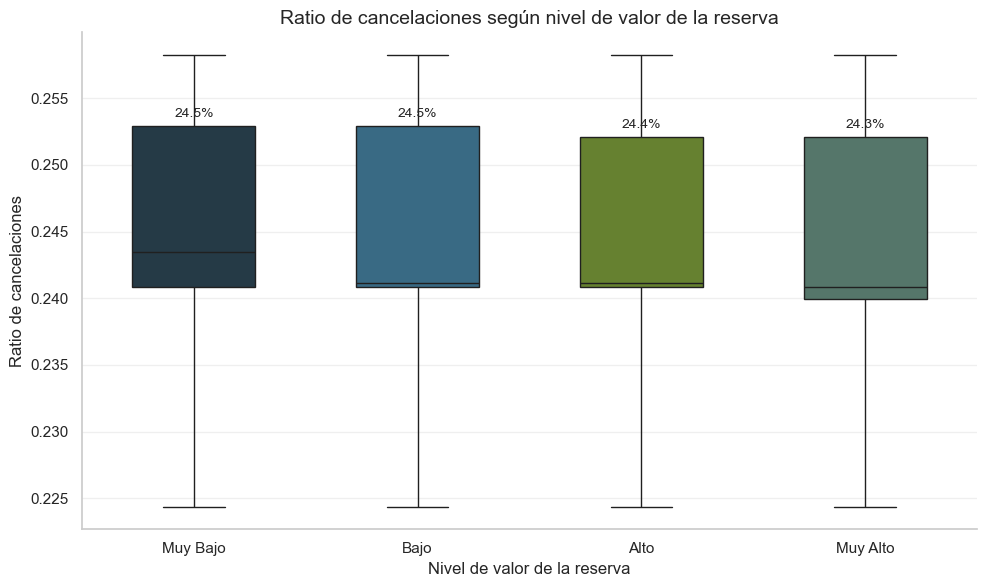

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette_hospitality = [
    "#1F3C4B", "#2C6E91", "#6B8E23", "#4F7C6B",
    "#E6D5B8", "#D8CFC4", "#C97C5D", "#C9A24D",
    "#4A4A4A", "#9E9E9E", "#F7F4EF", "#1C1C1C"
]
sns.set_theme(
    style="whitegrid",
    palette=palette_hospitality,
    rc={
        "figure.figsize": (10, 6),
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "lines.linewidth": 2,
        "grid.alpha": 0.3,
        "font.size": 11
    }
)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette_hospitality)
df['nivel_valor'] = pd.qcut(
    df['reservation_net_value'],
    q=4,
    labels=['Muy Bajo', 'Bajo', 'Alto', 'Muy Alto']
)
fig, ax = plt.subplots()
sns.boxplot(
    data=df,
    x='nivel_valor',
    y='ratio_cancelaciones_mes_respecto_reservas',
    showfliers=False,
    width=0.55,
    palette=palette_hospitality[:df['nivel_valor'].nunique()],
    ax=ax
)

promedios = df.groupby('nivel_valor')['ratio_cancelaciones_mes_respecto_reservas'].mean()
cuartiles = df.groupby('nivel_valor')['ratio_cancelaciones_mes_respecto_reservas'].quantile(0.75)
rango = (
    df['ratio_cancelaciones_mes_respecto_reservas'].max()
    - df['ratio_cancelaciones_mes_respecto_reservas'].min()
)
for i, nivel in enumerate(promedios.index):
    valor = promedios[nivel]
    tope_caja = cuartiles[nivel]
    ax.text(
        i,
        tope_caja + 0.02 * rango,
        f"{valor * 100:.1f}%",
        ha='center',
        fontsize=10
    )
ax.set_title('Ratio de cancelaciones según nivel de valor de la reserva')
ax.set_xlabel('Nivel de valor de la reserva')
ax.set_ylabel('Ratio de cancelaciones')
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
sns.despine()
plt.tight_layout()
fig.savefig(
    "ratio_cancelaciones_boxplot.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()




<Figure size 1000x600 with 0 Axes>